In [27]:
!pip install pytrends
from pytrends.request import TrendReq
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
trends = TrendReq()

In [29]:
data_2022 = trends.top_charts(2022, hl='en-US', tz=300, geo='GLOBAL')
data_2022.head(10)

,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,
5,World Cup,
6,India vs West Indies,
7,iPhone 14,
8,Jeffrey Dahmer,
9,Indian Premier League,


In [30]:
realtime_trends = trends.trending_searches()
realtime_trends.head(10)

,0
0,Dictionary
1,Fulham vs Tottenham
2,Classroom
3,Drive
4,Forspoken
5,S&P 500
6,Doja Cat
7,WWE 2K23
8,UFC
9,George Kittle


In [31]:
trends = TrendReq()
trends.build_payload(kw_list=["Data Science"])
data = trends.interest_by_region()
data = data.sort_values(by="Data Science", ascending=False)
data = data.head(20)
print(data)

                      Data Science
geoName                           
China                          100
Ethiopia                        98
Singapore                       98
India                           97
Nigeria                         83
Pakistan                        68
Kenya                           68
Ghana                           67
Nepal                           65
Hong Kong                       54
United Arab Emirates            53
Sri Lanka                       53
Tunisia                         46
South Africa                    45
Bangladesh                      42
United States                   40
Lebanon                         39
Canada                          38
Australia                       37
Philippines                     37


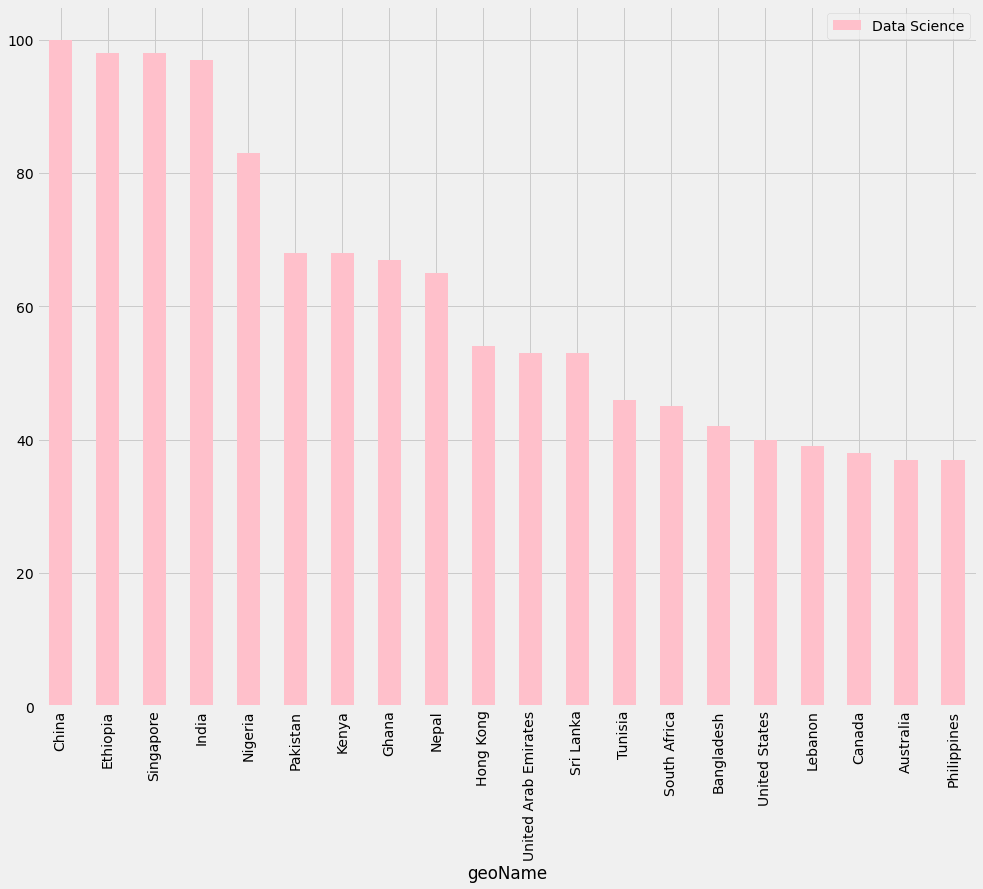

In [32]:
data.reset_index().plot(x="geoName", 
                        y="Data Science", 
                        figsize=(15,12), kind="bar", color = 'pink')
plt.show()

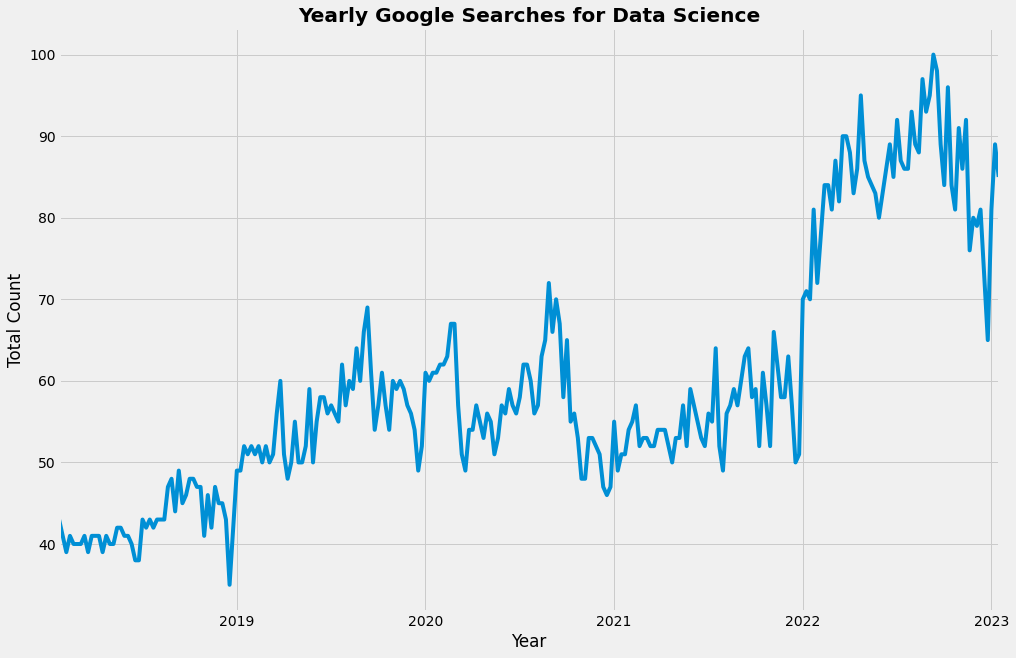

In [33]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Data Science'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(15, 10))
data['Data Science'].plot()
plt.style.use('fivethirtyeight')
plt.title('Yearly Google Searches for Data Science', 
          fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

In [34]:
mean = round(data.mean(),2)
avg = round(data['Data Science'][-52:].mean(),2)
trend = round(((avg/mean['Data Science'])-1)*100,2)
print('Average Interest over 5 years of ' + "Data Science" + ' was ' + str(mean['Data Science']))

Average Interest over 5 years of Data Science was 59.63


In [35]:
kw_list=['AI', 'Machine Learning', 'Analytics']
trends.build_payload(kw_list=kw_list)

related_queries = trends.related_queries()
related_queries.values()

top = list(related_queries.values())[0]['top']
rising = list(related_queries.values())[0]['rising']

In [36]:
top.head(10)

,query,value
0,google ai,100
1,ai generator,74
2,ai art,64
3,what is ai,61
4,open ai,49
5,ai meaning,40
6,ai marketing,40
7,ai artificial intelligence,38
8,artificial intelligence,38
9,data ai,37


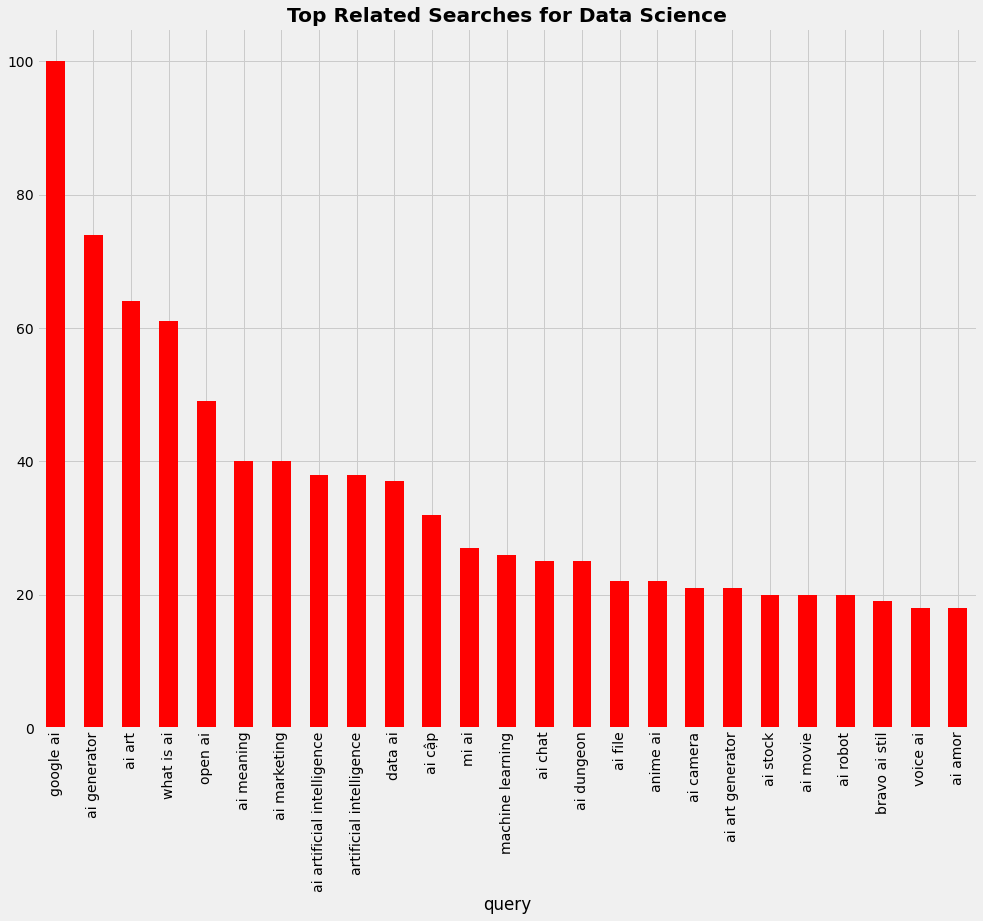

In [37]:
top.reset_index().plot(x="query", 
                        y="value", 
                        figsize=(15,12), kind="bar", color = 'red', legend = False)
plt.title('Top Related Searches for Data Science', 
          fontweight='bold')
plt.show()

In [38]:
rising.head(10)

,query,value
0,midjourney ai,23600
1,midjourney,23200
2,ai art generator,22900
3,wombo ai,22550
4,image generator ai,17450
5,chat gpt,13950
6,ai chung tình được mãi,13900
7,chatgpt,11750
8,lg uhd tv ai thinq,10150
9,ai somnium files,9050


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12409 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_

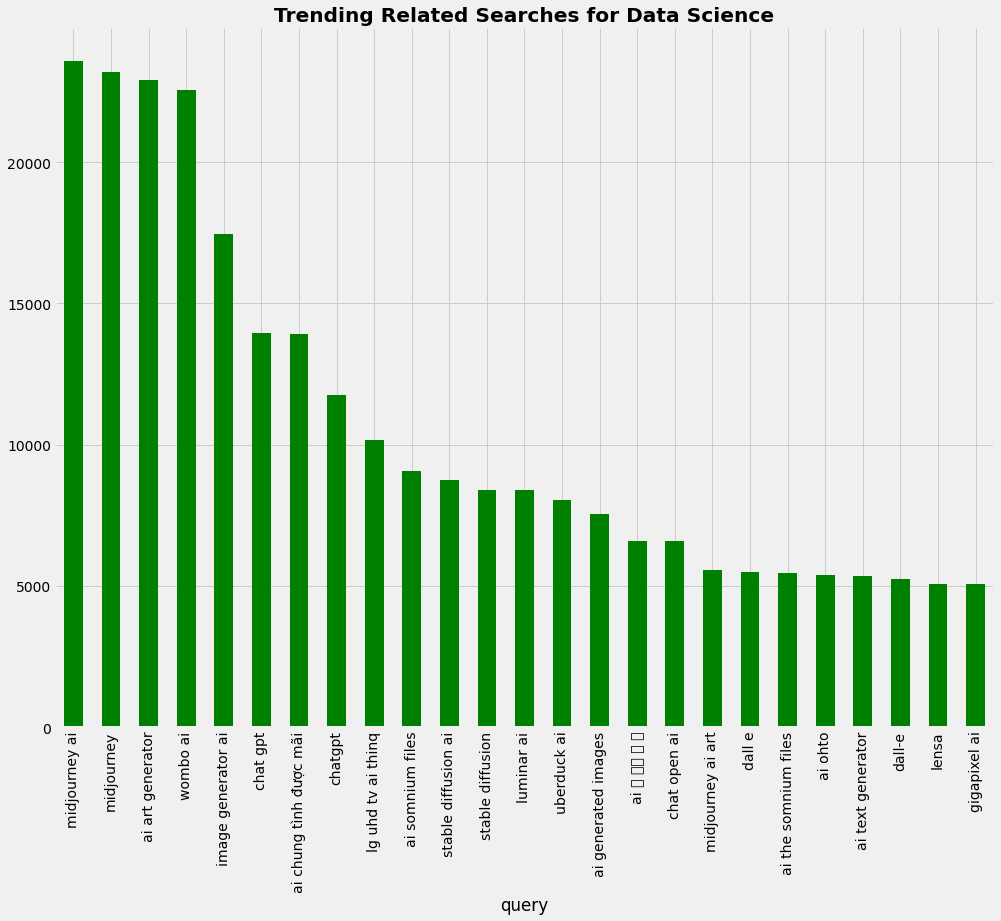

In [39]:
rising.reset_index().plot(x="query", 
                        y="value", 
                        figsize=(15,12), kind="bar", color = 'green', legend = False)
plt.title('Trending Related Searches for Data Science', 
          fontweight='bold')
plt.show()